### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [121]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd, numpy as np, statsmodels.api as sm, seaborn as sns

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [122]:
# Question 1: Import the datafile tw_tweets_users_media_places.csv that was 
# provided with this checkpoint. Set tweet_id as the index. Print the number 
# of records in this dataset in the output. How many records are there?
df = pd.read_csv("/content/tw_tweets_users_media_places.csv")
df.set_index(['tweet_id'], drop=True, inplace=True)
print(df.shape[0])
df.head()

534


,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,quotes,referenced_tweet_count,replies,reply_settings,retweets,source,terms,username,created_at_author,followers_count,following_count,tweet_count,listed_count,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,0,0,8,everyone,0,Twitter for Android,covid%20autism,MacRaeLady,2012-10-27T02:37:45.000Z,2709,4999,96,15,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,0,0,0,everyone,0,Twitter for iPhone,covid%20autism,zoebarratt1,2014-02-18T21:25:52.000Z,140,735,99,0,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,1,0,0,everyone,20,Twitter for iPhone,covid-19%20autistic,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,0,0,0,everyone,1,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,2,0,0,everyone,21,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [123]:
# Question 2: Make a copy of the DataFrame with all non-numeric features
# removed. Print out a list of the remaining columns in the output. Print
# the first five records of this reduced dataset.
df_copy = df.copy()

for col in df_copy:
  if not pd.api.types.is_numeric_dtype(df_copy[col]):
    df_copy.drop(columns=[col], inplace=True)

df_copy.drop(columns=['protected', 'verified'], inplace=True)

for col in df_copy:
  print(col)

df_copy.head()

context_annotations_count
count_annotations
count_cashtags
count_hashtags
count_mentions
count_urls
likes
quotes
referenced_tweet_count
replies
retweets
followers_count
following_count
tweet_count
listed_count
height
width


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width
tweet_id,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048


In [124]:
# Question 3: Using 'retweets' as the label, create an MLR model using all
# features except 'likes', 'quotes', 'replies', and the label. These features
# each represent outcomes, or alternatives to the label 'rewteets.' If our
# plan is to use this model to predict the popularity of new potential tweets,
# then we would not know what the likes, quotes, or replies will be. Therefore,
# we will eliminate them from the model. Print out the model results summary.

y = df_copy.retweets
X = df_copy.drop(columns=['likes', 'quotes', 'replies', 'retweets']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.578
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           3.81e-05
Time:                        20:42:47   Log-Likelihood:                -2328.2
No. Observations:                 534   AIC:                             4682.
Df Residuals:                     521   BIC:                             4738.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [125]:
# Question 4: Add the scored (i.e. predicted) values for every record 
# back into the original dataframe using the column label "model_1". Print
# the first five records.
df_copy['model_1'] = results.fittedvalues

df_copy.head()

,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,likes,quotes,referenced_tweet_count,replies,retweets,followers_count,following_count,tweet_count,listed_count,height,width,model_1
tweet_id,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,14,0,0,8,0,2709,4999,96,15,405,813,6.395809
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,7,0,0,0,0,140,735,99,0,2048,1536,2.022634
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,49,1,0,0,20,7510,7260,100,103,288,278,5.030170
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,3,0,0,0,1,7510,7260,100,103,2048,2048,1.159034
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,15,2,0,0,21,7510,7260,100,103,2048,2048,1.159034


In [126]:
# Question 5: Calculate and/or print the following five metrics for the 
# model you ran in the prior steps: R-squared, R-squared adjusted, RMSE, 
# MAE, and mean of the label column.
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae

print(f'rsquared: {results.rsquared}')
print(f'rsquared_adj: {results.rsquared_adj}')
print(f'rmse: {sqrt(mean_squared_error(df_copy["retweets"], df_copy["model_1"]))}')
print(f'mae: {mae(df_copy["retweets"], df_copy["model_1"])}')
print(f'retweets: {df_copy.retweets.mean()}')


rsquared: 0.07614441144416206
rsquared_adj: 0.0548655879073674
rmse: 18.934566285584516
mae: 5.159386575412137
retweets: 3.900749063670412


In [127]:
# Question 6: We need to improve the model fit so that our predictions will
# be more accurate. Let's begin by incorporating the two date columns from
# the original dataset. Convert the features 'created_at_tweet' and 
# 'created_at_author' to an integer representing the number of days since
# those dates until January 1st, 2022. Do not put these values into new 
# columns. Replace the existing dates with those values. HINT: you will find
# many examples online of how to do this. But I used the strptime() method 
# of the datetime package to cast "2022-1-1" into a date, subtract the column
# value from that date, and then return the result in days (.dt.days). Print
# the first five records of this new dataset.
from datetime import datetime

created_at_tweet = []
created_at_author = []

for i in range(0, len(df['created_at_tweet'])):
  date_tweet = datetime.strptime(f'{df["created_at_tweet"].iloc[i][:10]}', "%Y-%m-%d")
  difference = datetime(2022, 1, 1) - date_tweet
  created_at_tweet.append(difference.days)
  #print(type(difference.days))

created_at_tweet_np = np.array(created_at_tweet)
#print(type(created_at_tweet_np[0]))

for i in range(0, len(df['created_at_author'])):
  date_author= datetime.strptime(f'{df["created_at_author"].iloc[i][:10]}', "%Y-%m-%d")
  difference = datetime(2022, 1, 1) - date_author
  created_at_author.append(difference.days)

created_at_author_np = np.array(created_at_author)

df['created_at_tweet'] = created_at_tweet_np
df['created_at_author'] = created_at_author_np

df.head()

,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,quotes,referenced_tweet_count,replies,reply_settings,retweets,source,terms,username,created_at_author,followers_count,following_count,tweet_count,listed_count,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,101,en,14,0,0,8,everyone,0,Twitter for Android,covid%20autism,MacRaeLady,3353,2709,4999,96,15,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,104,en,7,0,0,0,everyone,0,Twitter for iPhone,covid%20autism,zoebarratt1,2874,140,735,99,0,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,630,en,49,1,0,0,everyone,20,Twitter for iPhone,covid-19%20autistic,SteveHardyLDN,3652,7510,7260,100,103,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,625,en,3,0,0,0,everyone,1,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,3652,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,628,en,15,2,0,0,everyone,21,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,3652,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [128]:
# Question 7: Create another model that includes these two new columns
# representing the number of days since Jan 1, 2022. As before, eliminate
# all remaining non-numeric features and the other label candidates 'likes',
# 'quotes', and 'replies'. Print out the results summary.

df_copy2 = df.copy()

for col in df_copy2:
  if not pd.api.types.is_numeric_dtype(df_copy2[col]):
    #print(col)
    df_copy2.drop(columns=[col], inplace=True)

protected = df_copy2.protected
verified = df_copy2.verified
df_copy2.drop(columns=['protected', 'verified'], inplace=True)




y = df_copy2.retweets
X = df_copy2.drop(columns=['likes', 'quotes', 'replies', 'retweets']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.225
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           6.40e-05
Time:                        20:42:47   Log-Likelihood:                -2327.1
No. Observations:                 534   AIC:                             4684.
Df Residuals:                     519   BIC:                             4748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
context_annotations_co

In [129]:
# Question 8: Once again, print out the fit metrics--R-squared, R-squared-adjusted,
# RMSE, MAE--as well as the label mean for this revised model. 
df_copy2['model_2'] = results.fittedvalues
print(f'rsquared: {results.rsquared}')
print(f'rsquared_adj: {results.rsquared_adj}')
print(f'rmse: {sqrt(mean_squared_error(df_copy2["retweets"], df_copy2["model_2"]))}')
print(f'mae: {mae(df_copy2["retweets"], df_copy2["model_2"])}')
print(f'retweets: {df_copy2.retweets.mean()}')

rsquared: 0.08003388236213416
rsquared_adj: 0.05521784065321289
rmse: 18.894666585876298
mae: 5.256920240721409
retweets: 3.900749063670412


In [130]:
# Question 9: We want to improve model fit even further by generating 
# dummy codes for some of the categorical features that do not have too many 
# group values like 'text' and 'url' do. In particular, generate dummy 
# codes for 'lang', 'reply_settings', 'source', 'protected', 'verified', and
# 'terms' and include them in the original dataframe. Remove all remaining 
# non-numeric features as well as the alternative labels 'likes', 'quotes', 
# and 'replies'. Print out the first five records.
df_dummies = df.copy()

df_dummies = pd.get_dummies(df_dummies, columns=['lang', 'reply_settings', 'source', 'protected', 'verified', 'terms'], prefix="", prefix_sep="", drop_first=True)

for col in df_dummies:
  if not pd.api.types.is_numeric_dtype(df_dummies[col]):
    print(col)
    df_dummies.drop(columns=[col], inplace=True)

df_dummies = df_dummies.drop(columns=['likes', 'quotes', 'replies']).assign(const=1)

print(df_dummies.shape)
df_dummies.head()

text
username
location
media_type
preview_image_url
country
name_place
place_type
(534, 55)


,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,referenced_tweet_count,retweets,created_at_author,followers_count,following_count,tweet_count,listed_count,height,width,en,es,fr,in,it,tr,und,mentionedUsers,Hootsuite Inc.,Sprout Social,Twitter for Android,Twitter for iPad,Twitter for iPhone,dlvr.it,True,"""social distancing""%20autistic",corona%20autism,corona%20autistic,coronavirus%20autism,coronavirus%20autistic,"covid%20""sensory overload""","covid%20""sensory processing""",covid%20autism,covid%20autistic,covid-19%20autism,covid-19%20autistic,covid19%20autism,covid19%20autistic,"lockdown%20""sensory overload""",lockdown%20autism,lockdown%20autistic,"pandemic%20""sensory overload""",pandemic%20autism,pandemic%20autistic,"quarantine%20""sensory overload""",quarantine%20autism,quarantine%20autistic,quarantine%20neurotypical,const
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1440484799970304000,1,0.0,0.0,0.0,0.0,1.0,101,0,0,3353,2709,4999,96,15,405,813,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1439618825171963904,2,2.0,0.0,3.0,0.0,1.0,104,0,0,2874,140,735,99,0,2048,1536,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1248872872837332992,3,0.0,0.0,0.0,0.0,1.0,630,0,20,3652,7510,7260,100,103,288,278,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1250729294051053568,1,2.0,0.0,3.0,0.0,2.0,625,0,1,3652,7510,7260,100,103,2048,2048,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1249612131433095168,1,2.0,0.0,3.0,0.0,2.0,628,0,21,3652,7510,7260,100,103,2048,2048,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [131]:
# Question 10: Generate another model using all remaining numeric features
# along with these new dummy codes AND the days since dates features we 
# created previously. Print out the results summary.

y = df_dummies.retweets
X = df_dummies.drop(columns=['retweets']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.643
Date:                Fri, 15 Oct 2021   Prob (F-statistic):            0.00436
Time:                        20:42:47   Log-Likelihood:                -2305.7
No. Observations:                 534   AIC:                             4717.
Df Residuals:                     481   BIC:                             4944.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
context_an

In [132]:
# Question 11: Now we have a fairly large number of features. But not all of
# them are significantly helping the model. Many of them have non-significant
# p-values or may be suffering from excessive multi-collinearity. Calculate
# the VIF score for each feature and add it to a new DataFrame. Sort the 
# DataFrame from largest to smallest VIF score and display it in the output.
# HINT: There may be a function in the book to help you with this.

def vif(df):
  import pandas as pd
  from sklearn.linear_model import LinearRegression
  
  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df.drop(columns=['const']):
    y = df[col]
    X = df.drop(columns=[col])
    
    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    if r_squared < 1: # Prevent division by zero runtime error
      vif = 1/(1 - r_squared) 
    else:
      vif = 100
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

    # generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

  return df_output.sort_values(by=['VIF'], ascending=False)

df_output = vif(df_dummies.drop(columns=['retweets']))
df_output


,VIF,Tolerance
Twitter for iPhone,133.680849,0.007481
Twitter for Android,128.646692,0.007773
count_mentions,100.000000,0.000000
listed_count,23.630154,0.042319
followers_count,21.414096,0.046698
en,21.285836,0.046980
und,13.405972,0.074594
Twitter for iPad,12.328201,0.081115
Hootsuite Inc.,5.200767,0.192279
covid19%20autism,4.936649,0.202567


In [133]:
# Question 12: We need to eliminate those features with excessive 
# multi-collinearity. However, this may happen naturally as we remove
# those features with large p-values. Therefore, start by removing the 
# feature with the highest p-value and then rerun the prior model. 
# One-at-a-time, continue removing the feature with the highest p-value 
# (rerunning the model each time) until the difference between R-squared
# and R-squared adjusted is <= 0.01. Why, because when R-squared adjusted
# is significantly lower than R-squared, we have too many variables in
# the model that are not significantly contributing to model fit. Once
# more, remove the highest p-value feature one-at-a-time until R-squared 
# minus R-squared adjusted is <= 0.10. You do NOT need to keep the results
# summary of every model. You can overwrite the prior model summary each 
# time until you meet the criterion.

df_dummies_vif = df_dummies.copy()
rsquared_diff = abs(results.rsquared_adj - results.rsquared)
df_output = vif(df_dummies_vif)
print(rsquared_diff)

while rsquared_diff > 0.01:
  
  #df_output = vif(df_dummies_vif.drop(columns=['retweets']))
  #print(df_output)
  #col_to_drop = df_output.iloc[0].name 
  #print(col_to_drop)
  col_to_drop = results.pvalues.idxmax()
  df_dummies_vif.drop(columns=[col_to_drop],inplace=True)
  print(col_to_drop)

  y = df_dummies_vif.retweets
  X = df_dummies_vif.drop(columns=['retweets']).assign(const=1)
  results = sm.OLS(y, X).fit()
  rsquared_diff = abs(results.rsquared_adj - results.rsquared)
  print(rsquared_diff)
  if (rsquared_diff <= 0.01):
    print(results.summary())

0.09179972044591656
es
0.08984762292918591
count_cashtags
0.08790374737655926
lockdown%20"sensory overload"
0.08596805602567914
quarantine%20neurotypical
0.0840404055489794
covid19%20autistic
0.08212093192341241
pandemic%20"sensory overload"
0.08020958437028858
quarantine%20autistic
0.0783074216340448
it
0.07641411059475167
covid%20"sensory overload"
0.07452911013971086
context_annotations_count
0.0726525633445253
quarantine%20"sensory overload"
0.07078551474557493
"social distancing"%20autistic
0.0689255782652668
corona%20autistic
0.06707708368847931
covid%20"sensory processing"
0.06523541969775204
dlvr.it
0.06340230404690972
Twitter for iPhone
0.0615655267148868
Hootsuite Inc.
0.05974475231314624
tr
0.057933738463853635
listed_count
0.05613110814495459
lockdown%20autism
0.054338533470092654
mentionedUsers
0.05255268434830751
in
0.050773030772498284
en
0.0489888201103883
fr
0.04721408253388382
und
0.045456921839476916
count_mentions
0.045456921839476916
True
0.04370594120485416
follow

In [134]:
# Question 13: For the remaining features in the last model you produced
# where the difference between R2 and R2-adj is <= 0.01, calculate the VIF
# scores and print them out in a table from largest VIF to smallest.
vif(df_dummies_vif.drop(columns=['retweets']))

,VIF,Tolerance
coronavirus%20autism,1.058081,0.945108
covid19%20autism,1.032721,0.968316
created_at_tweet,1.029342,0.971494
followers_count,1.007981,0.992082
Twitter for iPad,1.001620,0.998383


In [135]:
# Question 14: Now we have a nice and trim model. However, we cannot 
# compare the coefficients to each other since they are each on different
# scales. Therefore, use a Min-Max normalization to convert all features
# and label to the same scale. Print out the first five records.
from sklearn import preprocessing

df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_dummies_vif), columns=df_dummies_vif.columns)
df_minmax.head()

,created_at_tweet,retweets,followers_count,Twitter for iPad,coronavirus%20autism,covid19%20autism,const
0,0.000000,0.000000,0.004192,0.0,0.0,0.0,0.0
1,0.005300,0.000000,0.000217,0.0,0.0,0.0,0.0
2,0.934629,0.060606,0.011620,0.0,0.0,0.0,0.0
3,0.925795,0.003030,0.011620,0.0,1.0,0.0,0.0
4,0.931095,0.063636,0.011620,0.0,1.0,0.0,0.0


In [136]:
# Question 15: Rerun your last model using the normalized values. Print
# the results summary.
y = df_minmax.retweets
X = df_minmax.drop(columns=['retweets']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     13.55
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.87e-12
Time:                        20:42:49   Log-Likelihood:                 779.60
No. Observations:                 534   AIC:                            -1547.
Df Residuals:                     528   BIC:                            -1522.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
created_at_tweet        -0.0190 

skewness_retweets: 13.259866407153048


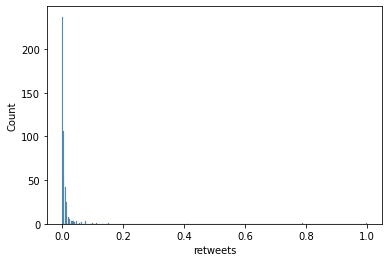

In [137]:
# Question 16: Now that we have addressed multi-collinearity and have
# standardized the features, we should examine and address skewness. Print
# the skewness score for the label 'retweets'. In addition, use the .histplot()
# object from the seaborn package to print out a histogram of 'retweets'.
from scipy.stats import skew

print(f"skewness_retweets: {skew(df_minmax['retweets'])}")
sns.histplot(df_minmax['retweets'])

skewness_retweets: 11.802867904902987


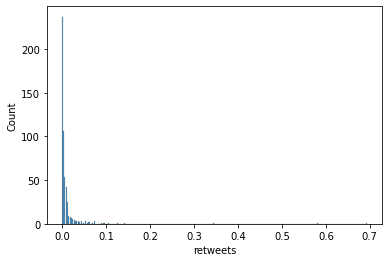

In [138]:
# Question 17: The skewness of retweets is clearly very extreme. However, we cannot 
# create a natural log transformation since there are zero values (ln(0) = undefined).
# Therefore, we need to +1 to all values before we calculate the natural log. 
# Thankfully, there is a numpy method for that: np.log1p(). Convert the 'retweets' 
# label to a natural log +1. Print out the new skewness and histogram.
df_minmax['retweets'] = np.log1p(df_minmax['retweets'])
print(f"skewness_retweets: {skew(df_minmax['retweets'])}")
sns.histplot(df_minmax['retweets'])

In [139]:
# Question 18: Rerun the last MLR model using this new natural log +1 version
# of 'retweets'. Print out the results summary.
y = df_minmax.retweets
X = df_minmax.drop(columns=['retweets']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               retweets   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     15.83
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.54e-14
Time:                        20:42:51   Log-Likelihood:                 943.36
No. Observations:                 534   AIC:                            -1875.
Df Residuals:                     528   BIC:                            -1849.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
created_at_tweet        -0.0118 